In [1]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import numpy as np

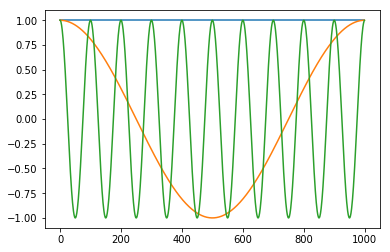

In [11]:
N = 1000

# tracer real(e^{2i\pikl/N}) pour l=0, 1, 2, 10, 100, 990, 999, 1000
l_range  = np.arange(N)

k=0
plt.plot(np.real(np.exp(2J*np.pi*k*l_range/N)))
k=1
plt.plot(np.real(np.exp(2J*np.pi*k*l_range/N)))
k=10
plt.plot(np.real(np.exp(2J*np.pi*k*l_range/N)))

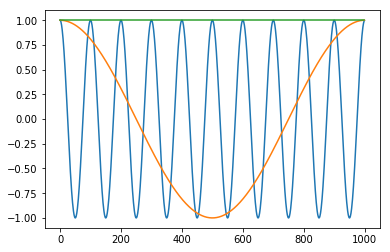

In [12]:
k=990
plt.plot(np.real(np.exp(2J*np.pi*k*l_range/N)))
k=999
plt.plot(np.real(np.exp(2J*np.pi*k*l_range/N)))
k=1000
plt.plot(np.real(np.exp(2J*np.pi*k*l_range/N)))

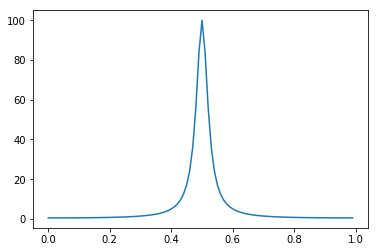

In [14]:
sample_rate = 100
delta_t = 1/sample_rate
T = 1
N = T*sample_rate

Tt = np.arange(N)*delta_t
y = 1/(1+0.99*np.cos(2*np.pi*Tt))

plt.plot(Tt, y)

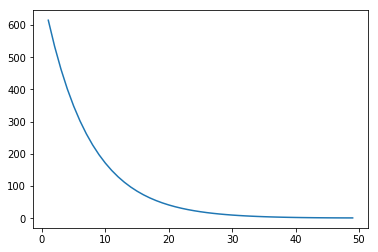

In [24]:
from numpy.fft import fft, fftfreq

T = 1
N = T*sample_rate

Tt = np.arange(N)*delta_t
y = 1/(1+0.99*np.cos(2*np.pi*Tt))

y_tilde = fft(y)

#TN = (np.arange(N)+N//2)%N - N//2
#Tfreq = TN/T
Tfreq = fftfreq(N, delta_t)
mask= (Tfreq>0)
plt.plot(Tfreq[mask], np.abs(y_tilde)[mask])

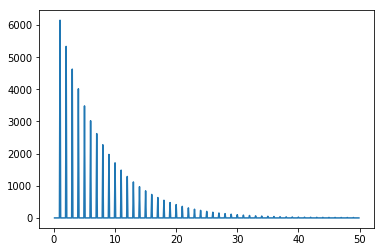

In [25]:
T = 10
N = T*sample_rate

Tt = np.arange(N)*delta_t
y = 1/(1+0.99*np.cos(2*np.pi*Tt))

y_tilde = fft(y)
Tfreq = fftfreq(N, delta_t)
mask= (Tfreq>0)
plt.plot(Tfreq[mask], np.abs(y_tilde)[mask])

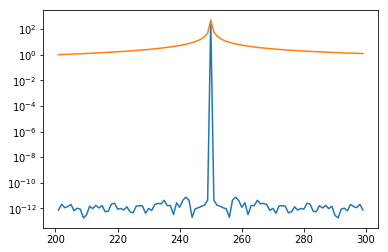

In [34]:
T = 1
N = 1000
sample_rate = N/T
delta_t = 1/sample_rate


#freq = 250
for freq in [250, 250.112334]:
    Tt = np.arange(N)*delta_t
    y = np.sin(2*np.pi*Tt*freq)

    y_tilde = fft(y)
    Tfreq = fftfreq(N, delta_t)

    mask = (Tfreq>200) & (Tfreq<300)
    plt.semilogy(Tfreq[mask], np.abs(y_tilde)[mask])


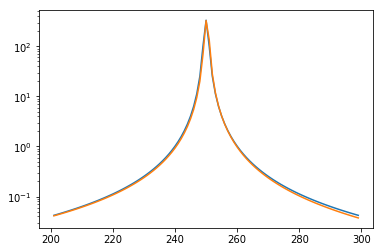

In [37]:
T = 1
N = 1000
sample_rate = N/T
delta_t = 1/sample_rate

fenetre = 1-np.linspace(-1, 1, N)**2

#freq = 250
for freq in [250, 250.112334]:
    Tt = np.arange(N)*delta_t
    y = np.sin(2*np.pi*Tt*freq)

    y_tilde = fft(y*fenetre)
    Tfreq = fftfreq(N, delta_t)

    mask = (Tfreq>200) & (Tfreq<300)
    plt.semilogy(Tfreq[mask], np.abs(y_tilde)[mask])


In [46]:
from numpy.fft import rfftfreq

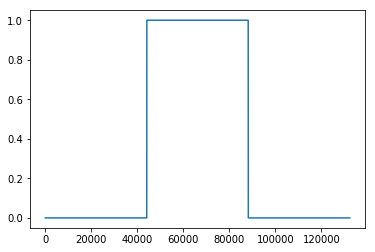

In [47]:
samplerate = 44100
delta_t = 1/samplerate
signal = np.zeros(samplerate*3)
signal[samplerate:samplerate*2] = 1
plt.plot(signal)

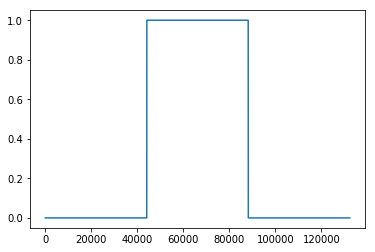

In [48]:
import numpy as np
signal_tilde = np.fft.rfft(signal)
signal_2 = np.fft.irfft(signal_tilde)
plt.plot(signal_2)

In [49]:
rfftfreq(len(signal), delta_t)

array([  0.00000000e+00,   3.33333333e-01,   6.66666667e-01, ...,
         2.20493333e+04,   2.20496667e+04,   2.20500000e+04])

In [55]:
def passe_bas(signal, f_c, samplerate=44100):
    """ Filtre passe base d'ordre 1
    Filtre passe bas implémenté en utilisant la DFT.
    Paramètres :
        signal : numpy array représentant le signal d'entrée
        f_c : fréquence de coupure
        samplerate : taux d'échantillonnage.
    Résultats :
        out_signal : le signal filtré
    """
    delta_t = 1/samplerate
    signal_tilde = np.fft.rfft(signal)
    Tfreq = rfftfreq(len(signal), delta_t)
    H = 1/(1+ np.abs(Tfreq/f_c))
    signal_2 = np.fft.irfft(signal_tilde*H)
    return signal_2

    

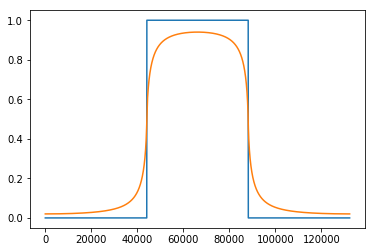

In [56]:
plt.plot(signal)
plt.plot(passe_bas(signal, 3))

In [ ]:
def passe_haut(signal, f_c, samplerate=44100):
    """ Filtre passe base d'ordre 1
    Filtre passe bas implémenté en utilisant la DFT.
    Paramètres :
        signal : numpy array représentant le signal d'entrée
        f_c : fréquence de coupure
        samplerate : taux d'échantillonnage.
    Résultats :
        out_signal : le signal filtré
    """
    delta_t = 1/samplerate
    signal_tilde = np.fft.rfft(signal)
    Tfreq = rfftfreq(len(signal), delta_t)
    H = 1J*(f/f_c)/(1+1J*Tfreq/f_c)
    signal_2 = np.fft.irfft(signal_tilde*H)
    return signal_2

    